In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NFLX']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download the data for each stock in tech_list
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Combine the data into a single DataFrame
company_list = [company_data[stock] for stock in tech_list]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA" , "NETFLIX"]

# Add company_name to each DataFrame
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
# Concatenate all the data into a single DataFrame
df = pd.concat(company_list, axis=0)

# Display the last 10 rows
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-12-16,923.940002,928.940002,919.500000,921.080017,921.080017,2674900,NETFLIX
2024-12-17,921.539978,928.450012,916.419983,919.130005,919.130005,2459500,NETFLIX
2024-12-18,919.130005,922.440002,886.559998,889.549988,889.549988,2938200,NETFLIX
2024-12-19,908.179993,912.619995,899.000000,902.039978,902.039978,2815500,NETFLIX
2024-12-20,893.210022,919.919983,890.489990,909.049988,909.049988,4530500,NETFLIX
2024-12-23,913.419983,915.000000,899.099976,911.450012,911.450012,2339400,NETFLIX
2024-12-24,915.000000,935.849976,911.700012,932.119995,932.119995,2320300,NETFLIX
2024-12-26,928.400024,930.489990,915.299988,924.140015,924.140015,2340300,NETFLIX
2024-12-27,916.010010,918.130005,894.500000,907.549988,907.549988,3226200,NETFLIX


In [2]:
# Summary Stats
company_data['AAPL'].describe()


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,191.813948,193.587738,190.176468,191.975159,191.485657,5.889691e+07
std,19.242106,19.453115,18.775747,19.148423,19.329411,2.497722e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,1.023689e+07
25%,175.557507,177.557503,174.002502,175.814999,174.919910,4.510405e+07
50%,188.029999,189.404999,186.779999,188.024994,187.314201,5.303340e+07
75%,205.700001,211.507504,202.400005,207.652504,207.412430,6.547662e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


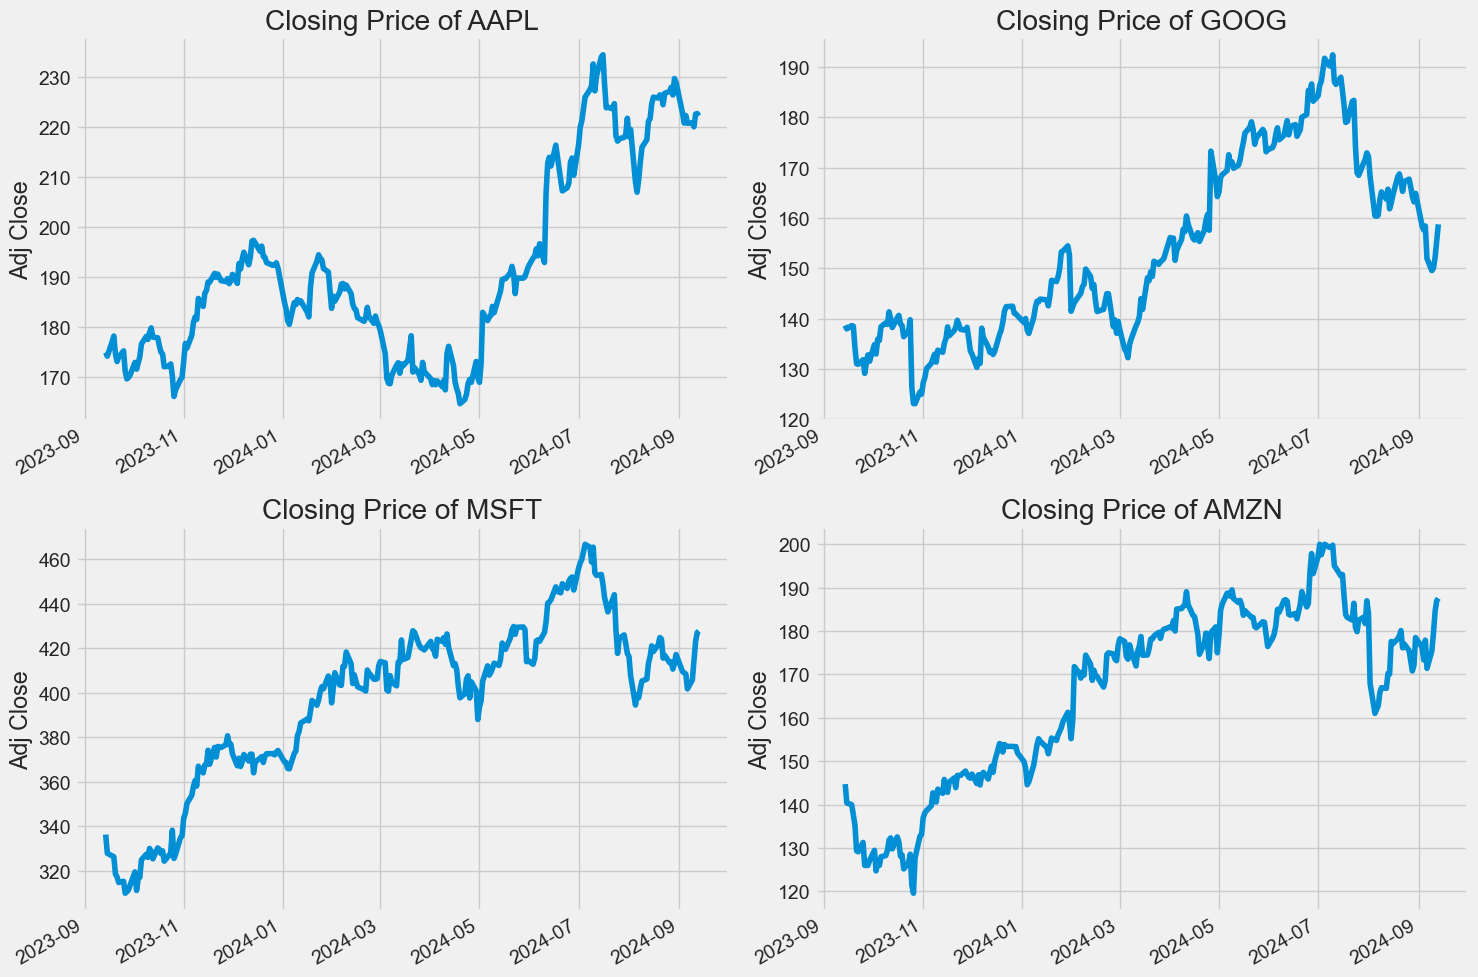

In [3]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

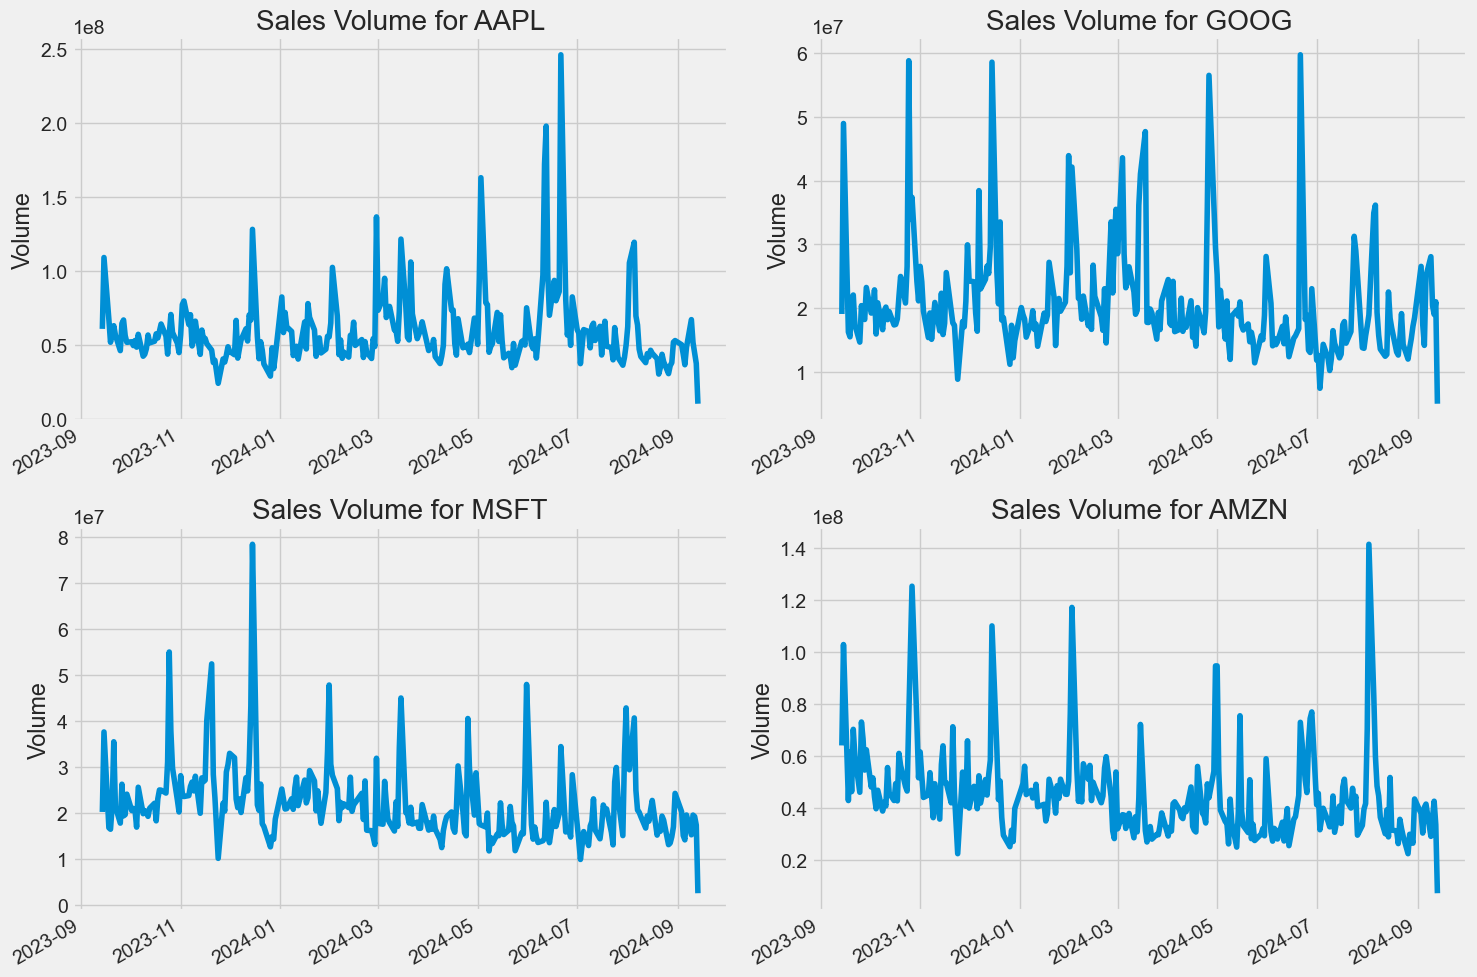

In [4]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

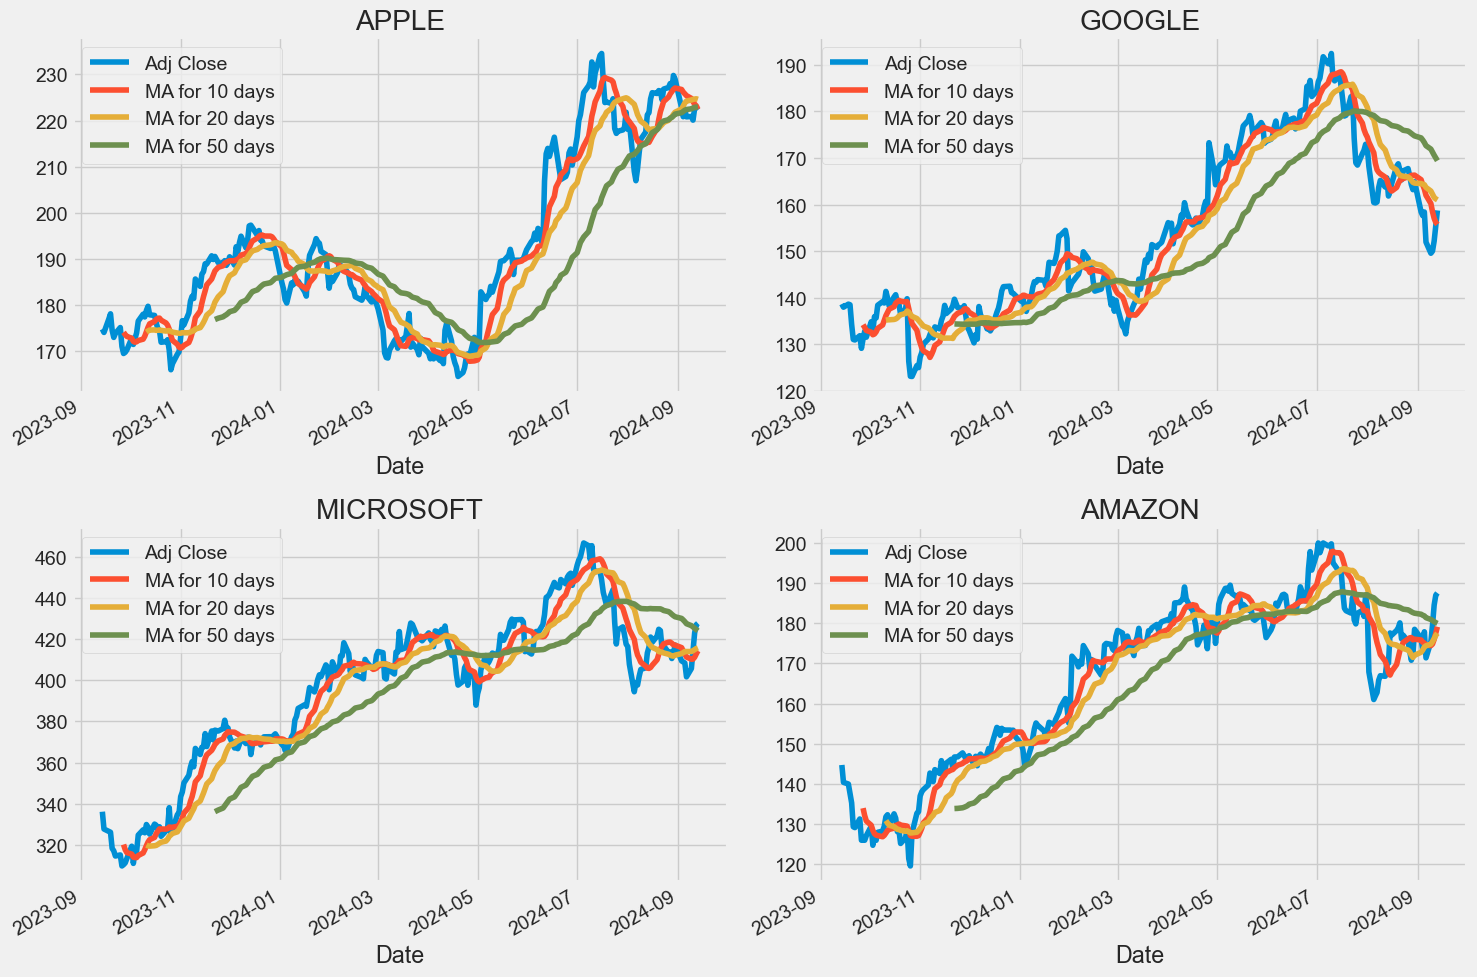

In [5]:
ma_day = [10, 20, 50]

# Calculate the moving averages and add them to each company's DataFrame
for ma in ma_day:
    for stock in tech_list:
        column_name = f"MA for {ma} days"
        company_data[stock][column_name] = company_data[stock]['Adj Close'].rolling(ma).mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot the data for each company
company_plots = [
    ('AAPL', axes[0, 0], 'APPLE'),
    ('GOOG', axes[0, 1], 'GOOGLE'),
    ('MSFT', axes[1, 0], 'MICROSOFT'),
    ('AMZN', axes[1, 1], 'AMAZON')
]

for stock, ax, title in company_plots:
    company_data[stock][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
    ax.set_title(title)

fig.tight_layout()
plt.show()


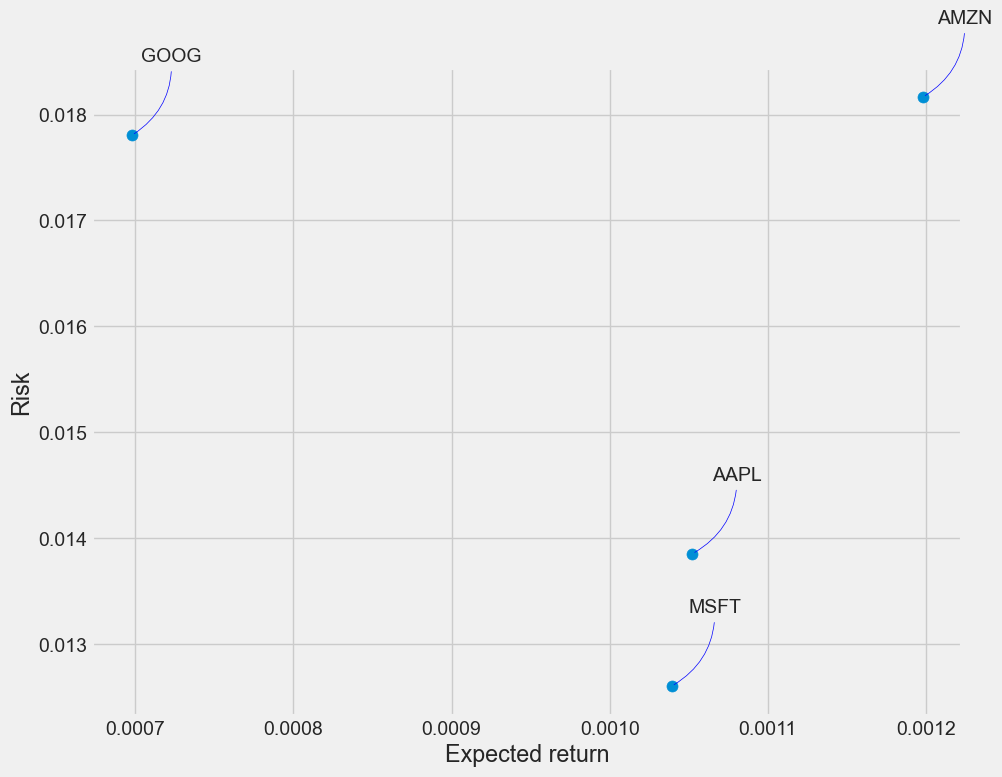

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Download the adjusted closing prices for the tech stocks
closing_prices = {}
for stock in tech_list:
    closing_prices[stock] = company_data[stock]['Adj Close']

# Combine the adjusted closing prices into a single DataFrame
closing_df = pd.DataFrame(closing_prices)

# Calculate the daily returns
tech_rets = closing_df.pct_change()
rets = tech_rets.dropna()

# Set the size for the scatter plot points
area = np.pi * 20

# Plotting the risk vs. expected return
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Annotate the points on the plot
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()


In [3]:
# Get the stock quote for AAPL using yfinance
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402626,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469280,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607711,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739510,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719305,394024400
...,...,...,...,...,...,...
2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100
2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200
2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36766600


In [5]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3038

In [7]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.94422118],
       [0.91624127],
       [0.91836913]])

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2978/2978 ━━━━━━━━━━━━━━━━━━━━ 137s 44ms/step - loss: 0.0028


In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step


4.7923401285593705

C:\Users\Hamza\AppData\Local\Temp\ipykernel_21436\2182512924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


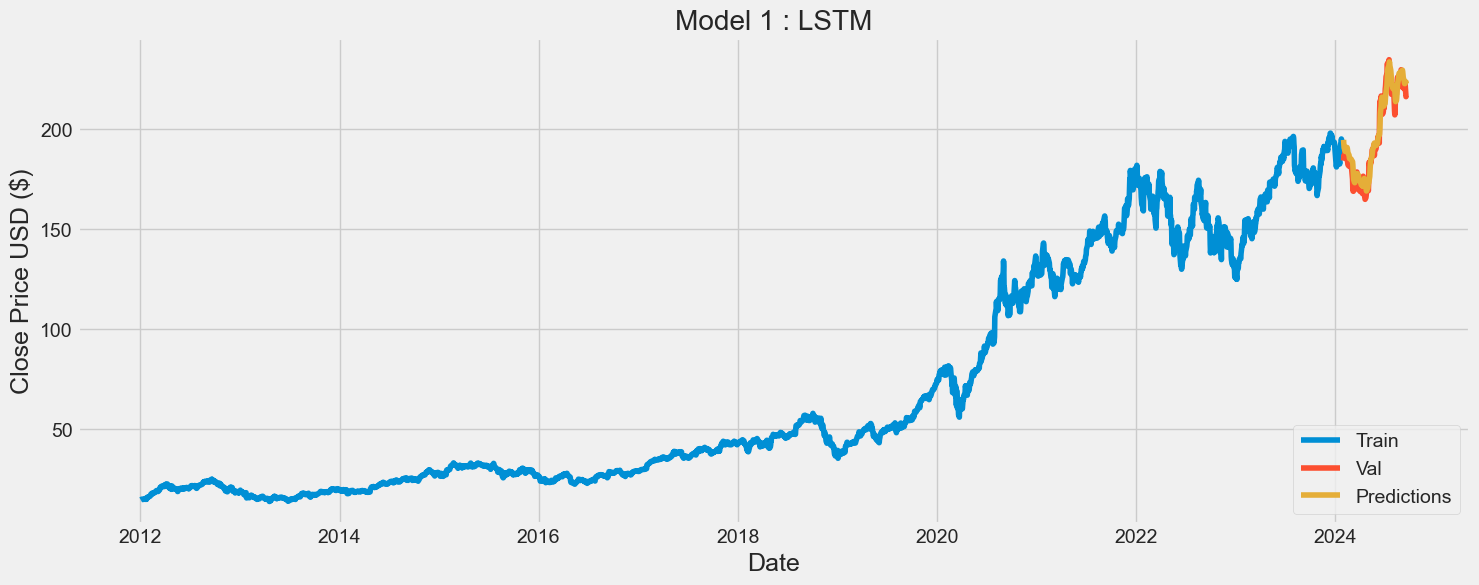

In [16]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model 1 : LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-01-31,184.399994,194.716782
2024-02-01,186.860001,192.486572
2024-02-02,185.850006,190.793732
2024-02-05,187.679993,189.473938
2024-02-06,189.300003,188.978836
...,...,...
2024-09-11,222.660004,222.820267
2024-09-12,222.770004,222.853851
2024-09-13,222.500000,223.254120


In [20]:
!pip install pydot pydot-ng graphviz


  Obtaining dependency information for pydot-ng from https://files.pythonhosted.org/packages/3c/5b/9a08333f2d70d404ffe42cea4f50159c4ad94feaa4d7585551c05cacef46/pydot_ng-2.0.0-py2.py3-none-any.whl.metadata


In [28]:
from keras.utils import plot_model

# Plot the model and save it to a file
plot_model(model, to_file='C:/Users/Hamza/Documents/mq/session 2/research', show_shapes=True, show_layer_names=True)



You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


C:\Users\Hamza\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0477 - val_loss: 2.9720e-04
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0026 - val_loss: 2.9774e-04
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0023 - val_loss: 3.1541e-04
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0024 - val_loss: 2.7481e-04
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0018 - val_loss: 2.6558e-04
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0018 - val_loss: 2.6640e-04
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0021 - val_loss: 4.2953e-04
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0019 - val_loss: 2.7465e-04
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0019 - val_loss: 2.9145e-04
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0018 - val_loss: 3.8706e-04
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0018 - val_loss: 2.6975e-04
Epoch 12/20
37/37 ━

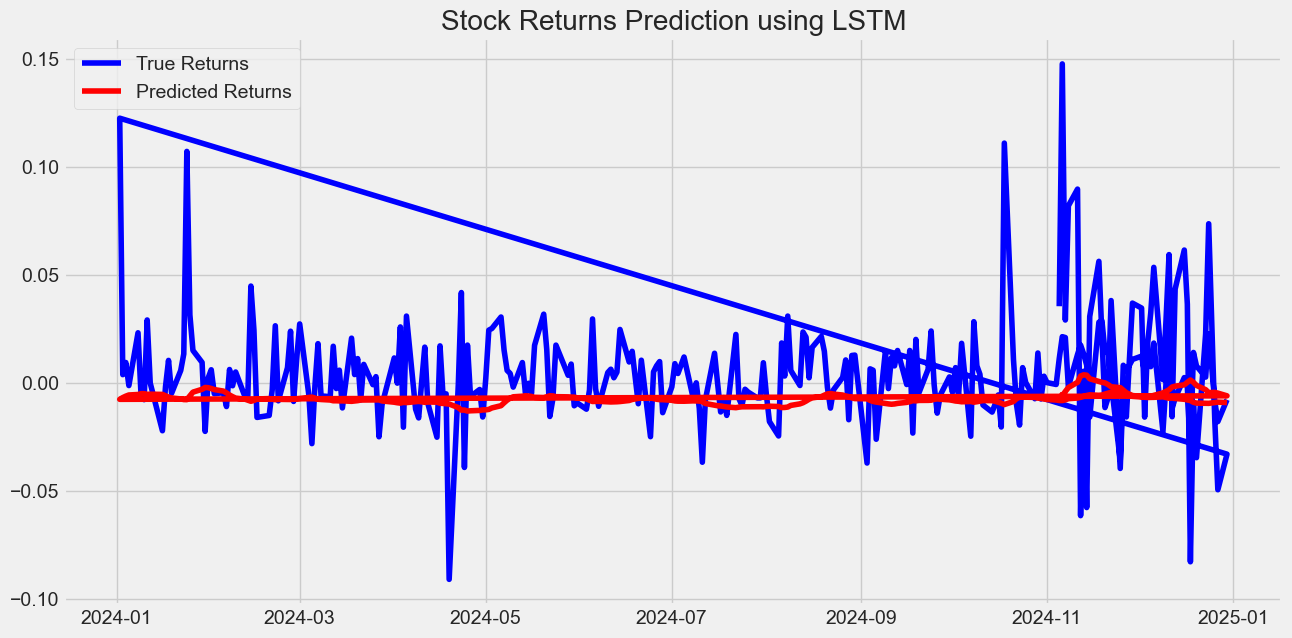

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# 1. Preprocess the Data
# Use only 'Close' prices and calculate returns
df['returns'] = df['Close'].pct_change()
df.dropna(inplace=True)

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['returns']].values)

# Create sequences for LSTM
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 3. Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 5. Evaluate the Model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# 6. Make Predictions
predicted_returns = model.predict(X_test)
predicted_returns = scaler.inverse_transform(predicted_returns)

# Visualize Results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Returns', color='blue')
plt.plot(df.index[-len(y_test):], predicted_returns, label='Predicted Returns', color='red')
plt.title('Stock Returns Prediction using LSTM')
plt.legend()
plt.show()
